# Multilayer Perceptron MNIST

## Imports

In [1]:
%matplotlib inline

import warnings
import random
import pprint

import numpy as np
import pandas as pd
import seaborn as sn

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.datasets.base import get_data_home 
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

## Baixando e configurando o dataset

In [2]:
#Ignorando os warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
print('Baixando MNIST data')
mnist_dataset = fetch_mldata('MNIST original')
print('Download concluído.')

data = mnist_dataset.data
target = mnist_dataset.target
#mages = mnist_dataset.images

tamanho_dataset_teste = 0.2

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=tamanho_dataset_teste, random_state=42)

print(f"Training dataset size: {len(data_train)}")
print(f"Test dataset size: {len(target_train)}")


Baixando MNIST data
Download concluído.
Training dataset size: 56000
Test dataset size: 56000


Alguns números do dataset:

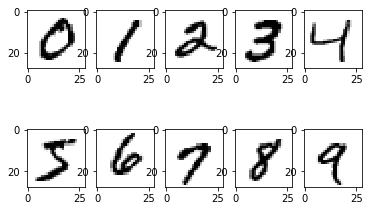

In [3]:
fig, ax = plt.subplots(2,5)
for i, ax in enumerate(ax.flatten()):
    im_idx = np.argwhere(target == i)[0]
    plottable_image = np.reshape(data[im_idx], (28, 28))
    ax.imshow(plottable_image, cmap='gray_r')

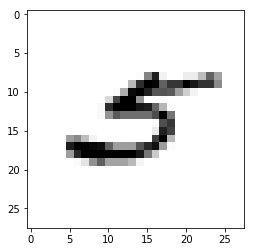

In [4]:
fig, ax = plt.subplots(1)
im_idx = 34567
plottable_image = np.reshape(data[im_idx], (28, 28))
ax.imshow(plottable_image, cmap='gray_r')

In [5]:
for index, value in enumerate(data[im_idx]):
    if index % 28 == 0: print("\n")
    print("{0:0=3d} ".format(value), end="")




000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 

000 000 000 000 000 000 000 000 000 000 000 000 000 000 003 124 221 013 000 000 018 01

In [6]:
classificador_MLP = MLPClassifier(hidden_layer_sizes=(64,128,64,10), verbose=True, alpha=0.0001, tol=1e-4)

print("Fitting model")
classificador_MLP.fit(data_train,target_train)
print("Fitting model ended")

Fitting model
Iteration 1, loss = 1.91836945
Iteration 2, loss = 0.99552875
Iteration 3, loss = 0.56147637
Iteration 4, loss = 0.35656583
Iteration 5, loss = 0.23354682
Iteration 6, loss = 0.18075025
Iteration 7, loss = 0.15213649
Iteration 8, loss = 0.12766803
Iteration 9, loss = 0.11261573
Iteration 10, loss = 0.09712798
Iteration 11, loss = 0.08971189
Iteration 12, loss = 0.07842321
Iteration 13, loss = 0.07050759
Iteration 14, loss = 0.06637850
Iteration 15, loss = 0.06011064
Iteration 16, loss = 0.05441903
Iteration 17, loss = 0.05281733
Iteration 18, loss = 0.04497318
Iteration 19, loss = 0.04837581
Iteration 20, loss = 0.04451286
Iteration 21, loss = 0.03976906
Iteration 22, loss = 0.04031231
Iteration 23, loss = 0.03196313
Iteration 24, loss = 0.02989883
Iteration 25, loss = 0.03508921
Iteration 26, loss = 0.03282834
Iteration 27, loss = 0.03074344
Iteration 28, loss = 0.02930884
Iteration 29, loss = 0.02559464
Iteration 30, loss = 0.02994679
Iteration 31, loss = 0.02981417
Ite

In [7]:
print("Começando testes")
predictions = classificador_MLP.predict(data_test)
print("Fim dos testes")

Começando testes
Fim dos testes


[[1326    0    3    2    0    1    7    1    7    2]
 [   0 1556    8    5    2    0    0    3    5    2]
 [   4    3 1353   10    2    0    3    8   15    2]
 [   0    0    7 1393    0   14    0    3   10    7]
 [   1    0    1    0 1296    2    6    4    2   16]
 [   3    1    0   23    3 1229    9    2    9    7]
 [   7    1    0    2    0    6 1379    0   11    1]
 [   3    1    9    3    2    0    1 1439    2   16]
 [   2    5    5    3    3   11    3    2 1351    6]
 [   5    1    1    6   14    8    1    6   12 1294]]


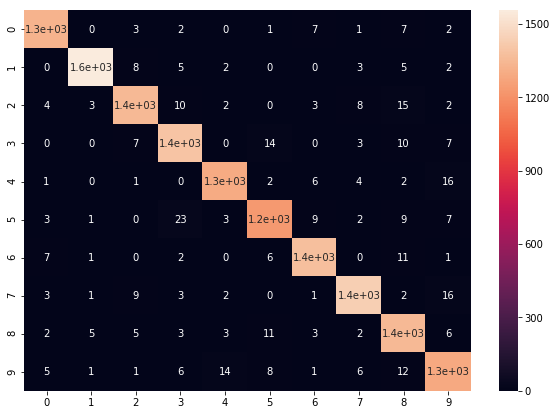

In [8]:
print(confusion_matrix(target_test,predictions))
cm = confusion_matrix(target_test,predictions)
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [9]:
print("Training set score: %f" % classificador_MLP.score(data_train, target_train))
print("Test set score: %f" % classificador_MLP.score(data_test, target_test))

Training set score: 0.998679
Test set score: 0.972571
